# Trabajo. Visualización de datos: consumo eléctrico de una vivienda.

En este trabajo, tenéis que completar algunos de los bloques de código para contestar a las preguntas que van apareciendo en el documento. 


Usaremos en este trabajo  los datos que ya exploramos en el trabajo sobre manipulación de datos y cálculo de resúmenes por grupos. El fichero es `household_hourly_power_consumption.txt`, que se puede descargar del aula virtual.

Empezamos por importar los módulos `pandas`, `pyplot` de `matplotlib`, y `path` de `os`, para tratar las  localizaciones de ficheros.

In [45]:
# Completar aquí: importar módulos
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path


# --------------------


## Cargamos los datos
Definimos la variable `DATA_DIRECTORY` que indica dónde están situados nuestros datos respecto a la localización de este `notebook`.

In [46]:
# Completar aquí: definir DATA_DIRECTORY

ROOT_DIR = Path("..") / ".."
DATA_DIR = ROOT_DIR / "data"
FIGURES_DIR = ROOT_DIR / "figures"
# --------------------


Podemos importar los datos en un `DataFrame` que llamaremos `vivienda`. Lo haremos especificando que la columna `date_hour` debe ser parseada como `datetime` y que la usaremos como `index`. Indicaremos la ubicación del fichero de datos usando `path.join` y la variable `DATA_DIRECTORY`.

In [47]:
# Completar aquí
vivienda = pd.read_csv(
    DATA_DIR / "household_hourly_power_consumption.txt",
    skiprows=13,
    sep=";",
    parse_dates=[0],
    index_col=0
)
# --------------------
vivienda

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
date_hour,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000


## Histograma de la potencia global activa
Empezaremos por representar un histograma de la potencia global activa, con 15 clases ("bins"). Este número de 15 se ha calculado usando la regla de Sturges.

(array([1.4218e+04, 4.6920e+03, 4.3270e+03, 4.6390e+03, 2.5430e+03,
        1.6050e+03, 9.8000e+02, 5.6400e+02, 2.9500e+02, 1.5100e+02,
        8.6000e+01, 4.1000e+01, 1.2000e+01, 8.0000e+00, 7.0000e+00]),
 array([0.124     , 0.55310222, 0.98220444, 1.41130667, 1.84040889,
        2.26951111, 2.69861333, 3.12771556, 3.55681778, 3.98592   ,
        4.41502222, 4.84412444, 5.27322667, 5.70232889, 6.13143111,
        6.56053333]),
 <BarContainer object of 15 artists>)

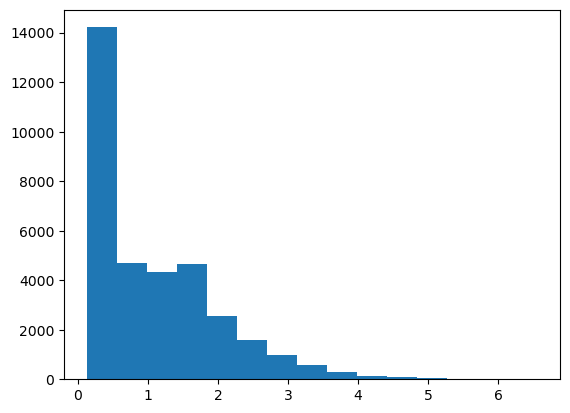

In [48]:
# Completar aquí
fig, ax = plt.subplots()
ax.hist(vivienda["global_active_power"], bins=15)

# --------------------


## Boxplots del voltaje según los años.
Vamos a obtener ahora unos diagramas de cajabigotes del voltaje según cada año. Para ello, empezamos por obtener cuántos datos tenemos por año en el conjunto. 

In [49]:
# Completar aquí:
years = vivienda.index.year.value_counts().sort_index()

# --------------------


Nuestra intención es hacer una gráfica que contenga los diagramas de caja bigotes uno al lado del otro, donde el eje Ox es el eje de los años, de 2006 a 2010.

Para ello, tendremos que usar una lista que contenga las series de `voltage` año por año y pasarla a `ax.boxplot`.

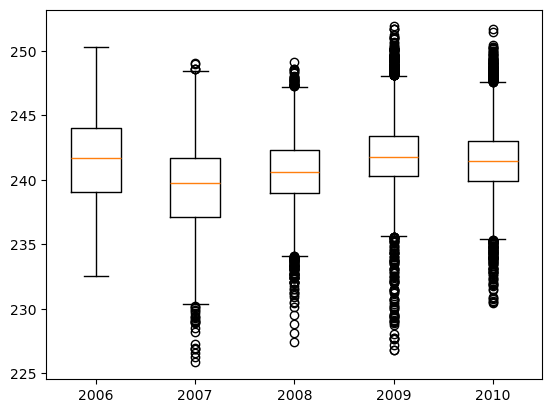

In [50]:
# Completar aquí
fig, ax = plt.subplots()
ax.boxplot([vivienda[vivienda.index.year == year]["voltage"].dropna() for year in years.index], labels=years.index);



# --------------------


Es posible (probable?) que, en vuestra gráfica, sólo aparezcan los años 2006 y 2008, a qué se podría deber? Cómo podríamos arreglarlo?

## Gráficas para la potencia global activa

Empezamos por representar la evolución temporal de la potencia global activa.

/tmp/ipykernel_19223/3933656502.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


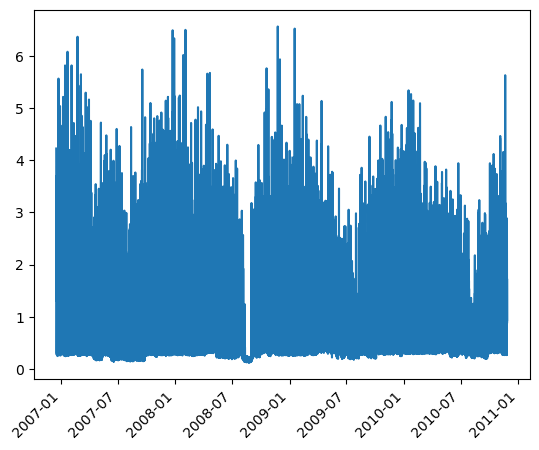

In [51]:
# Completar aquí
fig, ax = plt.subplots()
ax.plot(vivienda["global_active_power"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
# --------------------


Se observa algo destacable?

### Pequeñas modificaciones de la gráfica:

Realizad las modificaciones siguientes sobre la gráfica temporal:

1. Cambiad las etiquetas de los ejes: en el eje Ox, ponemos "Fecha", mientras que en el eje poned "Potencia global activa (kW).
2. Añadid el título "Evolución temporal de la potencia global activa consumida, 2006-2012"
3. Usando la función `savefig` de pyplot, guardad la gráfica en un fichero llamado potencia-global-activa-2006-2012.png en carpeta "figures" de vuestro directorio de trabajo para este trabajo. 


/tmp/ipykernel_19223/347692214.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


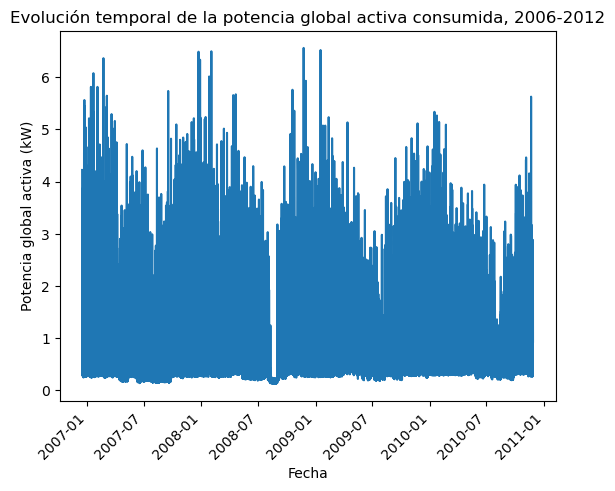

In [52]:
# Completar aquí
fig, ax = plt.subplots()
ax.plot(vivienda["global_active_power"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.set_xlabel("Fecha")
ax.set_ylabel("Potencia global activa (kW)")
ax.set_title("Evolución temporal de la potencia global activa consumida, 2006-2012")
fig.savefig(
    FIGURES_DIR / "potencia-global-activa-2006-2012.png"
)
# --------------------


### Seleccionamos los meses de julio a diciembre de 2008

Queremos realizar la misma gráfica pero si nos limitamos a los meses de julio hasta diciembre de 2008.
- Empezaremos por crear un `DataFrame` llamado `vivienda_2008` que sólo contenga las etiquetas de tiempo desde el 1 de julio de 2008 hasta el 31 de diciembre de 2008.
- Podemos usar `loc` para seleccionar etiquetas. Como el `index` es de tipo `datetime`, usaremos el constructor `datetime` del módulo `datetime`. Esta función nos permite construir una fecha especificando el año, mes y día, hora, mínuto, segundo. Ver su [documentación](https://docs.python.org/3/library/datetime.html#datetime.datetime)


In [53]:
# Completar aquí
from datetime import datetime
min_range = datetime(year=2008, month=7, day=1, hour=0)
max_range = datetime(year=2008, month=12, day=31, hour=23)
vivienda_2008 = vivienda.loc[(vivienda.index >= min_range) & (vivienda.index <= max_range), :]

# --------------------
print(f'Menor registro de tiempo: {vivienda_2008.index.min()}')
print(f'Mayor registro de tiempo: {vivienda_2008.index.max()}')
print(f'Número de registros: {vivienda_2008.shape[0]}')

Menor registro de tiempo: 2008-07-01 00:00:00
Mayor registro de tiempo: 2008-12-31 23:00:00
Número de registros: 4416


Hacemos la representación gráfica de la columna `global_active_power` de `vivienda_2008`.

/tmp/ipykernel_19223/4275923194.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


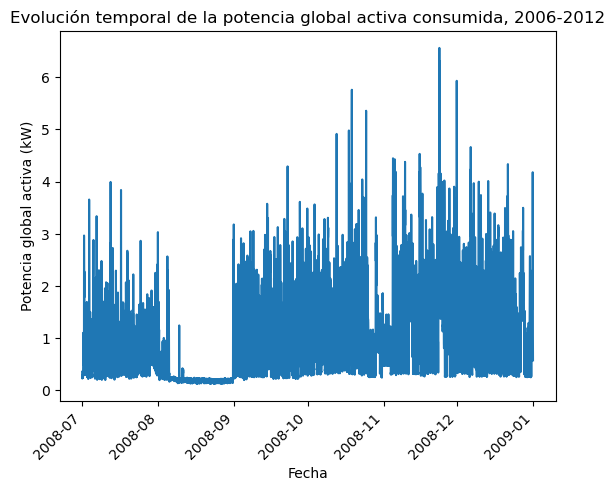

In [54]:
# Completar aquí
fig, ax = plt.subplots()
ax.plot(vivienda_2008["global_active_power"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.set_xlabel("Fecha")
ax.set_ylabel("Potencia global activa (kW)")
ax.set_title("Evolución temporal de la potencia global activa consumida, 2006-2012");


# --------------------


### Exploración del perfil horario de la potencia global consumida.


Vamos a explorar el perfil de evolución horario de la potencia global consumida.

Para ello, empezamos por construir un `DataFrame` que llamaremos *resumen_horario* y que
contenga el valor promedio de la potencia global activa consumida por hora (el promedio se hará, por hora, sobre todo
el conjunto `vivienda`).

`resumen_horario` tendrá por `index` la hora, y tendrá dos columnas `promedio`hora,  y n (el número de datos utilizado para calcular la media en cada grupo)

> Para obtener la hora de la columna `index` de `vivienda`, podréis usar el método 


In [55]:
# Completar aquí
resumen_horario = vivienda.groupby(lambda x: x.hour)["global_active_power"].agg(
    {
        ("promedio", np.mean),
        ("n", lambda x: x.count()),
    }
)

# --------------------
resumen_horario


/tmp/ipykernel_19223/2636545908.py:2: FutureWarning: The provided callable <function mean at 0x7ff46b10cb80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  resumen_horario = vivienda.groupby(lambda x: x.hour)["global_active_power"].agg(


,n,promedio
date_hour,,
0,1426,0.659562
1,1424,0.539325
2,1424,0.480618
3,1424,0.444850
4,1422,0.443844
5,1421,0.453674
6,1421,0.791606
7,1422,1.502373
8,1422,1.460940


Podemos ahora representar gráficamente el perfil de evolución horario usando `resumen_horario`
(Global_active_power promedio en función de hora). Queremos hacerlo con barras verticales. 

<BarContainer object of 24 artists>

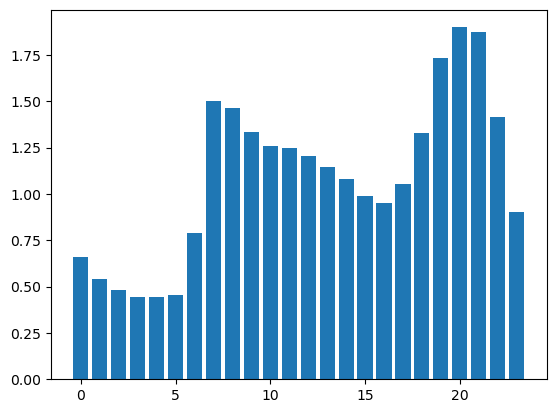

In [56]:
# Completar aquí
fig, ax = plt.subplots()
ax.bar(resumen_horario.index ,resumen_horario["promedio"])


# --------------------


### Opcional:
Podemos añadir el valor de la potencia calculada encima de cada barra en la gráfica

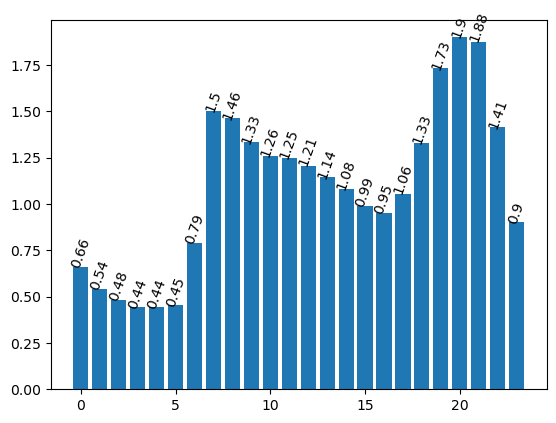

In [57]:
# Completar aquí
fig, ax = plt.subplots()
ax.bar(resumen_horario.index ,resumen_horario["promedio"])

x = resumen_horario.index
y = [round(value, 2) for value in resumen_horario["promedio"]]

for i in range(len(x)):
    plt.text(i, y[i], y[i], rotation=70, ha="center")


# --------------------


Vamos a ver si el perfil de evolución horaria es diferente según los días de la semana. Para ello,
necesitamos crear un nuevo `Series` resumen, que se llamará `resumen_horario_dia`, y que contenga
el promedio  de la potencia global activa consumida si desglosamos los datos por hora *y por día de la semana*.
Empezamos por crear dos columnas `dia_semana` y `hora` en el DataFrame `vivienda` usando los atributos `weekday` y `hour` de su índice.



In [58]:
# Completar aquí
vivienda["hora"] = vivienda.index.hour
vivienda["dia_semana"] = vivienda.index.day_of_week
# --------------------
vivienda

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3,hora,dia_semana
date_hour,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,17,5
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,18,5
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,19,5
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,20,5
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,21,5
...,...,...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667,17,4
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000,18,4
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000,19,4


Calculamos ahora `resumen_horario_dia`.

In [59]:
# Completar aquí

resumen_horario_dia = vivienda.groupby(["dia_semana", "hora"])["global_active_power"].agg("mean")
# --------------------
resumen_horario_dia

dia_semana  hora
0           0       0.531491
            1       0.450318
            2       0.413212
            3       0.423549
            4       0.428248
                      ...   
6           19      2.026754
            20      2.157163
            21      2.089381
            22      1.387676
            23      0.834612
Name: global_active_power, Length: 168, dtype: float64

Aplicamos el método `reset_index` (referencia: [enlace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)) a `resumen_horario_dia`, para que el índice multinivel resultado de groupby dé lugar a dos columnas que correspondan a día de la semana y a hora del día. 

In [60]:
# Completar aquí
resumen_horario_dia = resumen_horario_dia.reset_index()
# --------------------
resumen_horario_dia

,dia_semana,hora,global_active_power
0,0,0,0.531491
1,0,1,0.450318
2,0,2,0.413212
3,0,3,0.423549
4,0,4,0.428248
...,...,...,...
163,6,19,2.026754
164,6,20,2.157163
165,6,21,2.089381
166,6,22,1.387676


Procedemos a la representación gráfica

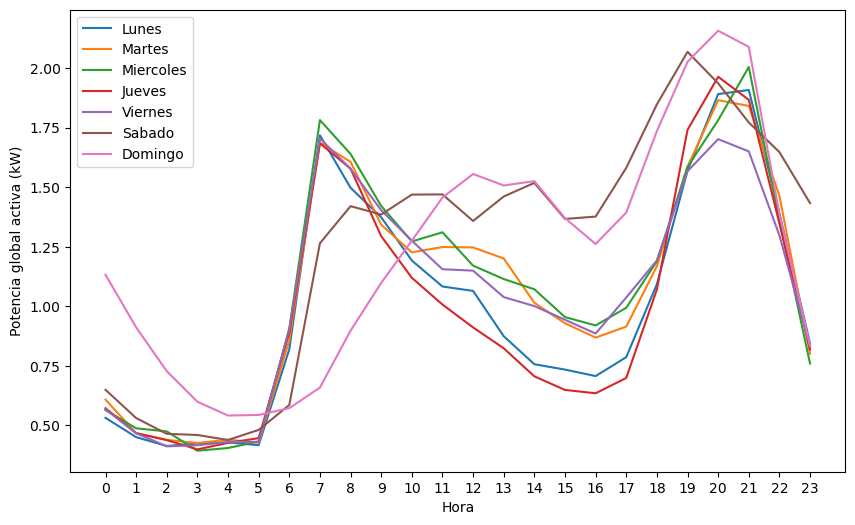

In [61]:
# Completar aquí

dias_semana = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
fig, axs = plt.subplots()

fig.set_size_inches(10, 6)
axs.set_xticks(range(24))
axs.set_xlabel("Hora")
axs.set_ylabel("Potencia global activa (kW)")

for dia, g in resumen_horario_dia.groupby("dia_semana"):
    axs.plot(g["hora"], g["global_active_power"], label=dias_semana[dia])

axs.legend();

# --------------------


Qué conclusión sacáis sobre el patrón de consumo de la familia según lso días de la semana?

+ Según la gráfica, se nota un patrón de consumo bastante regular en los días laborales, destacando dos picos de consumo, uno por la mañana y otro por la noche, coincidiendo con la hora del desayuno y la cena. Los fines de semana, el consumo es más regular, con un pico de consumo por la noche, lo cuál también indica que la familia no se encuentra fuera de casa estos días.

+ De lunes a viernes, a la hora de la comida (~13:00) no se muestra un pico de consumo, lo que sugiere que la familia no come en casa durante la semana.